## Learning Through Alphazero
book: jPub AI22


In [1]:
"""
Implementation of Book chapter 4-1
"""
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
"""
Slot Arm Implementation
"""


class SlotArm():
    def __init__(self,p):
        self.p=p
    
    def draw(self):
        if self.p>random.random():
            return 1.0
        else:
            return 0.0

In [3]:
"""
Epsilon - Greedy 

Algorithm
1. update select_arm execution time
2. update value of select_arm

 Vt=(n-1)/n*Vt-1+1/n*Rewardt


"""
class EpsilonGreedy():
    def __init__(self,epsilon):
        self.epsilon=epsilon #probability 
        
    # initializing arm execution number and value    
    def initialize(self,n_arms):
        self.n=np.zeros(n_arms) # each arms execution number
        self.v=np.zeros(n_arms) # each arms value
        
    def select_arm(self):
        #random selection
        if self.epsilon>random.random():
            return np.random.randint(0,len(self.v))
        #select largest value
        else:
            return np.argmax(self.v)
        
    #algorithm parameter update
    def update(self,chosen_arm,reward,t):
        self.n[chosen_arm]+=1
        # execution time +1
        
        
        n=self.n[chosen_arm]
        v=self.v[chosen_arm]
        self.v[chosen_arm]=((n-1)/float(n))*v + (1/float(n))* reward
        
    def label(self):
        return 'Epsilon-Greedy('+str(self.epsilon)+')'
        

In [4]:
"""
UCB1
1. update selected arm execution time +1
2. if suceed, update success time +1
3. if there is arm never used, don't update value
4. update each arms value

"""

class UCB1():
    def initialize(self,n_arms):
        #execution time
        self.n=np.zeros(n_arms)
        #value
        self.v=np.zeros(n_arms)
        #each arms success time
        self.w=np.zeros(n_arms)
    #select arm
    def select_arm(self):
        for i in range(len(self.n)):
            if self.n[i]==0:
                return i
        return np.argmax(self.v)
    
    #update
    def update(self,chosen_arm,reward,t):
        self.n[chosen_arm]+=1
        if reward==1.0:
            self.w[chosen_arm]+=1
        
        # Every arm must be executed even once
        for i in range(len(self.n)):
            if self.n[i]==0:
                return 
        for i in range(len(self.v)):
            self.v[i]=self.w[i]/self.n[i] + (2* math.log(t)/self.n[i])**0.5
            
    def label(self):
        return 'UCB1'
    
    

In [5]:
"""
Simulation
"""

def play(algo, arms , num_sims , num_time):
    times=np.zeros(num_sims * num_time)
    rewards=np.zeros(num_sims* num_time)
    
    for simulation in range(num_sims):
        algo.initialize(len(arms))
        
        for time in range(num_time):
            index=simulation*num_time+ time
            times[index]=time+1
            chosen_arm=algo.select_arm()
            reward=arms[chosen_arm].draw()
            rewards[index]=reward
            
            algo.update(chosen_arm,reward,time+1)
    return [times,rewards]
        
    

Epsilon-Greedy(0.1)
UCB1


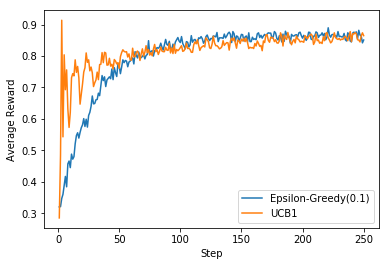

In [6]:
arms=(SlotArm(0.3),
     SlotArm(0.5),
     SlotArm(0.9))

algos=(EpsilonGreedy(0.1), UCB1())

for algo in algos:
    print(algo.label())
    results=play(algo,arms,1000,250)
    df=pd.DataFrame({'times': results[0], 'rewards': results[1]})
    mean=df['rewards'].groupby(df['times']).mean()
    plt.plot(mean,label=algo.label())
    
    
plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.legend(loc='best')
plt.show()